In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading, Understanding and Visualising the data

In [73]:
Bikesharing_data=pd.read_csv('C:/Users/Shameer/Downloads/Bikesharing_data.csv')
Bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
Bikesharing_data.shape

(730, 16)

In [75]:
Bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [76]:
Bikesharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [77]:
Bikesharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [78]:
# finding % of missing values in each column
round(100*(Bikesharing_data.isnull().sum()/len(Bikesharing_data)), 2).sort_values




<bound method Series.sort_values of instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64>

In [79]:
#finding % of  null values in rows

round((Bikesharing_data.isnull().sum(axis=1)/len(Bikesharing_data))*100,2).sort_values

<bound method Series.sort_values of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64>

## Findings 

#### There are no missing values


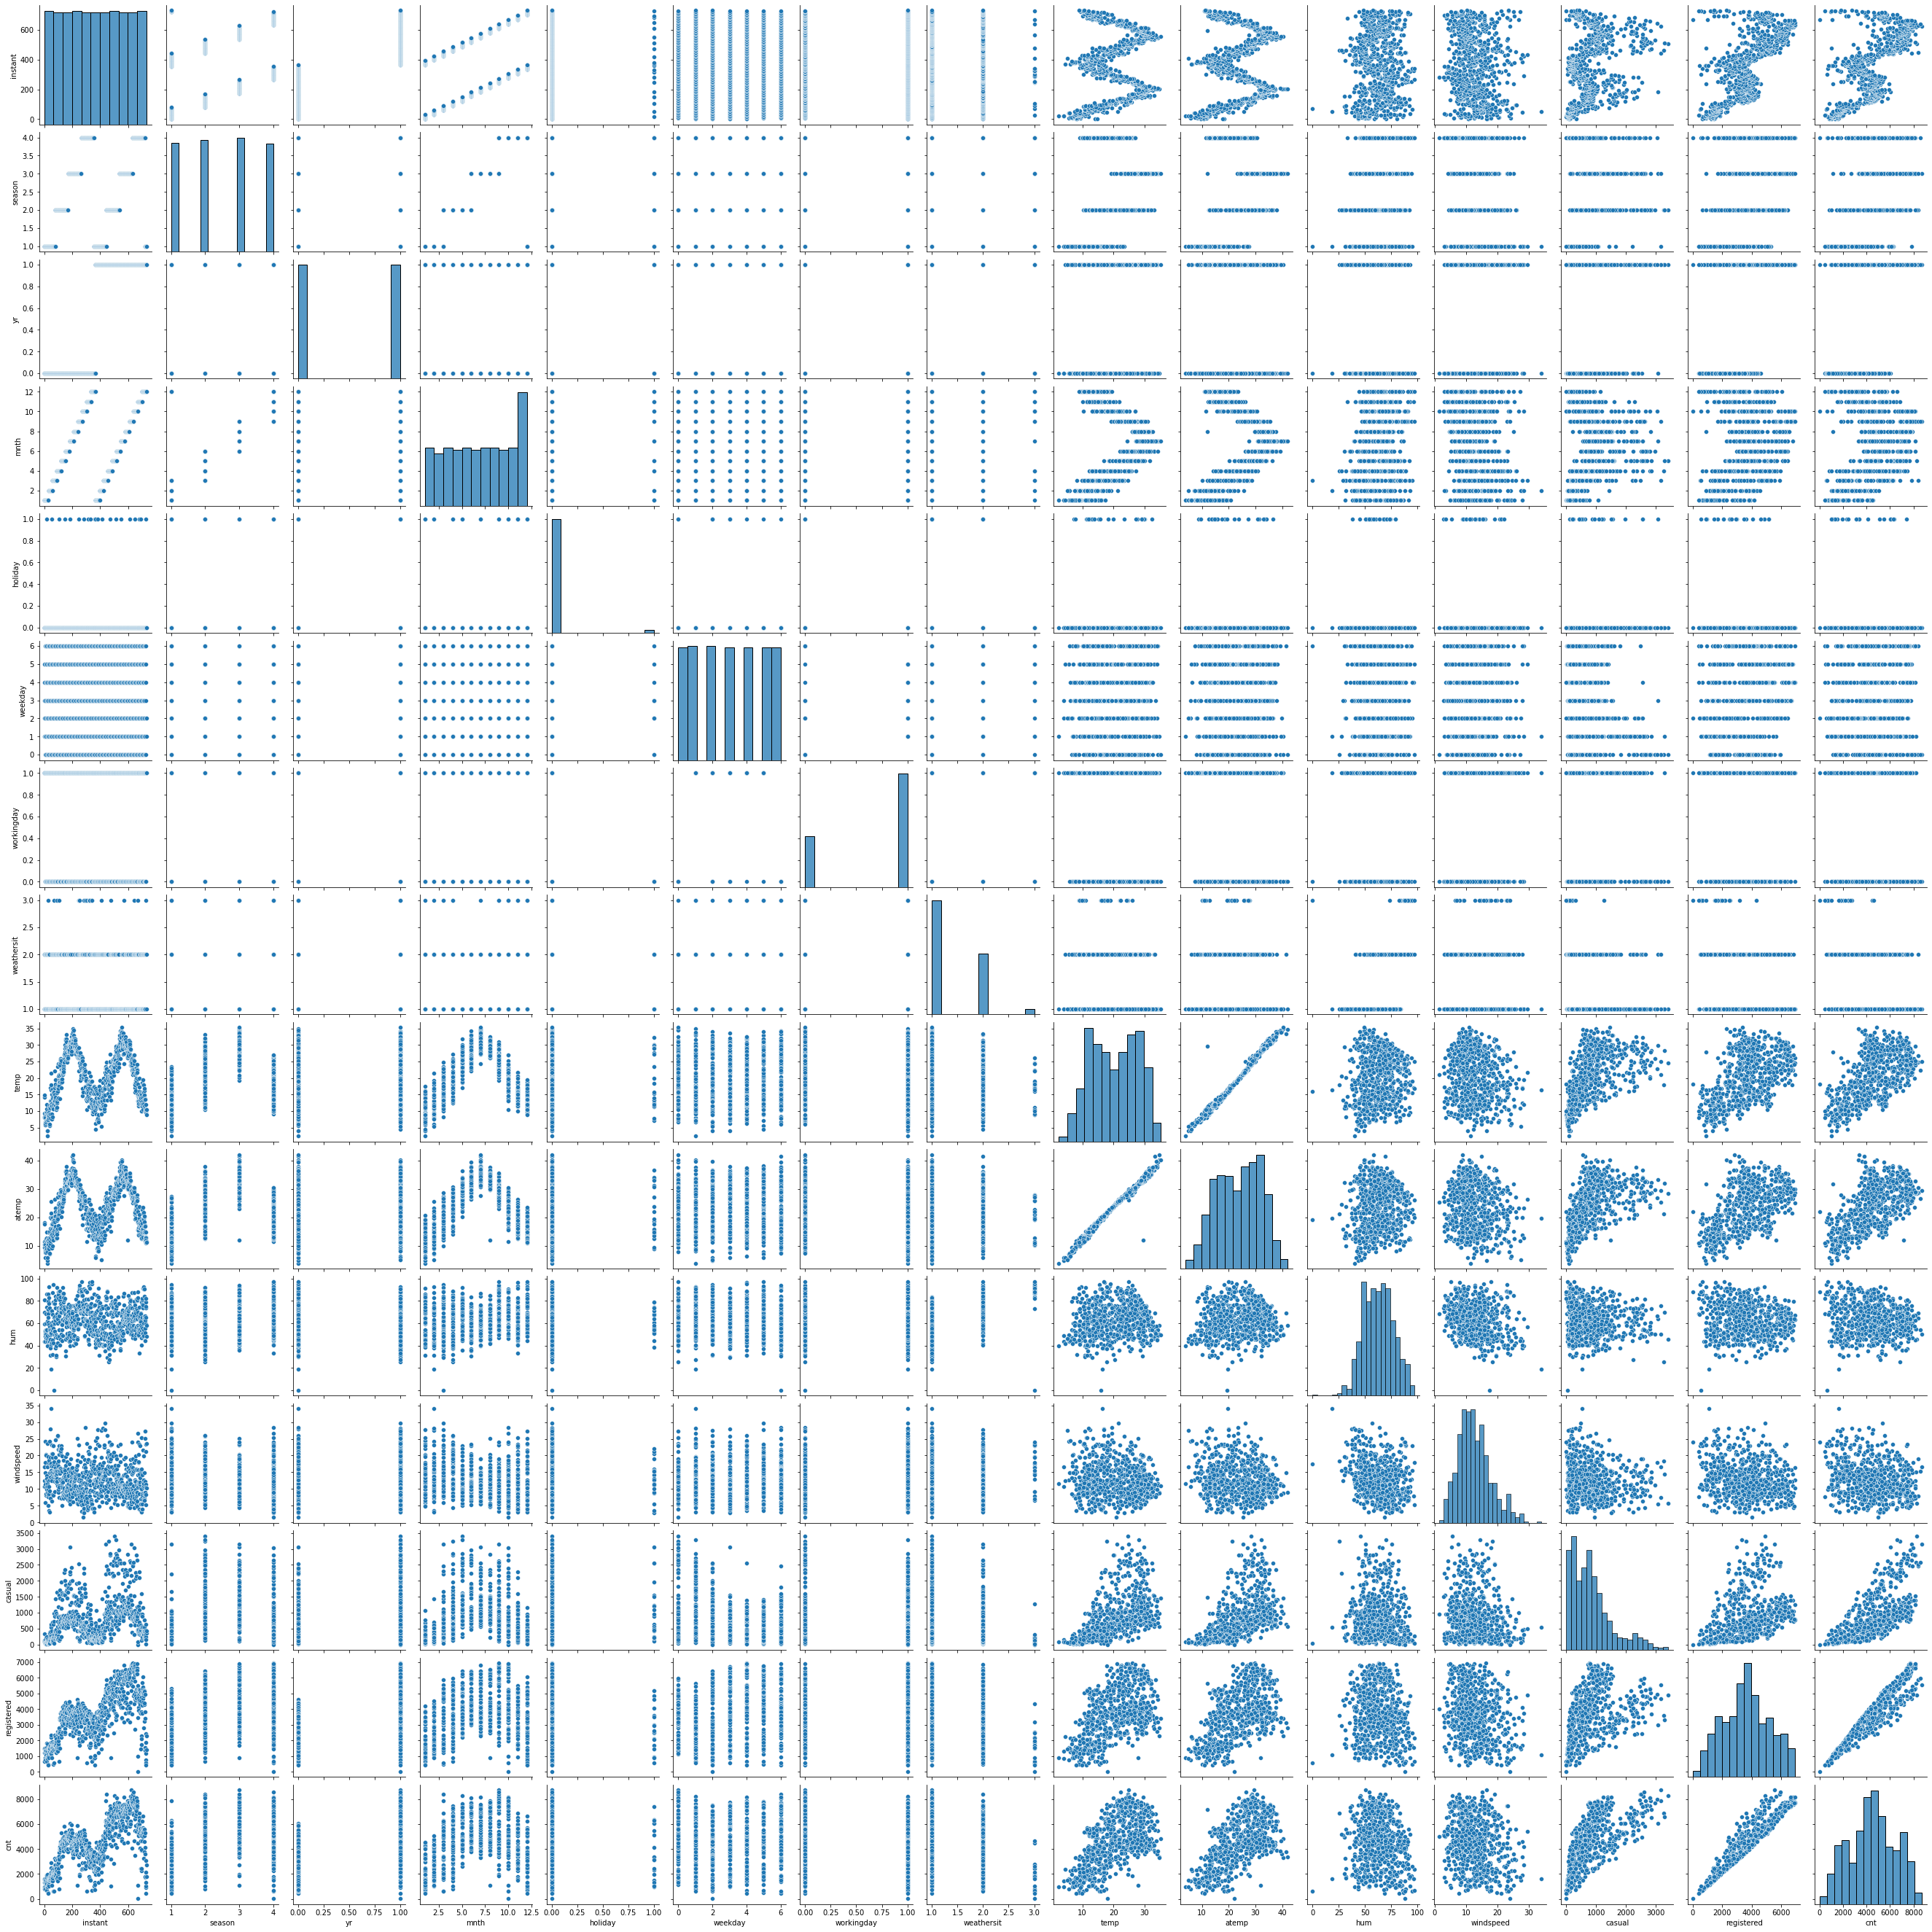

In [80]:
# visualising
sns.pairplot(Bikesharing_data)
plt.show()

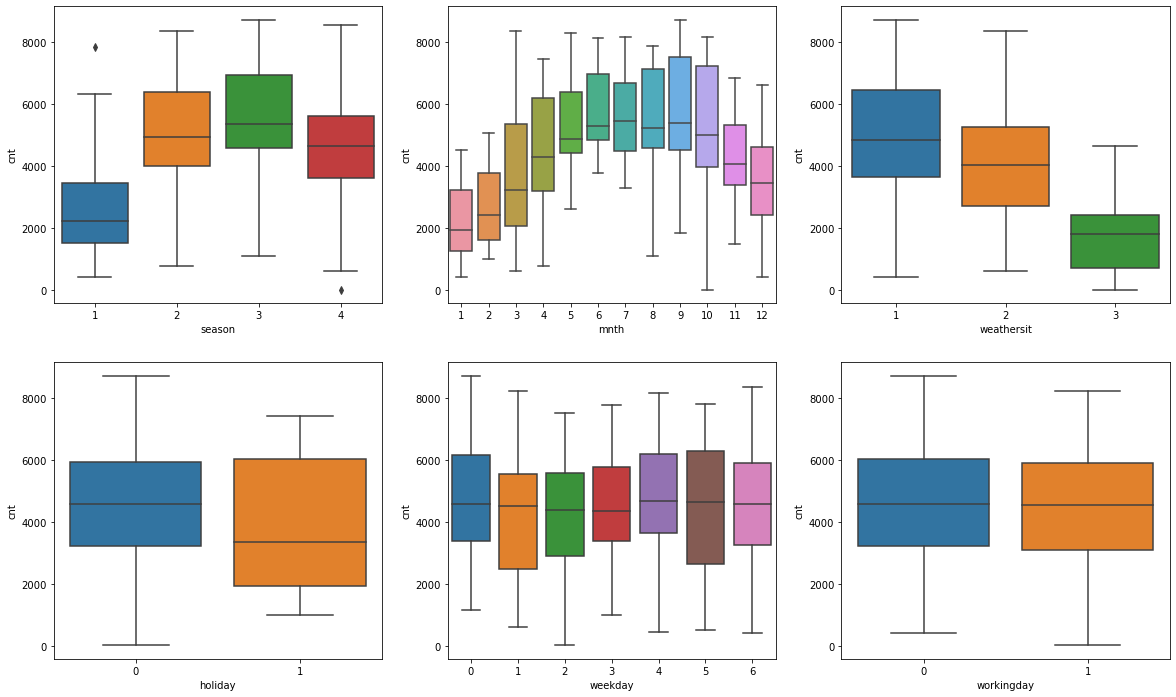

In [81]:
#visualising categorical variable
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)

sns.boxplot(x = 'season', y = 'cnt', data = Bikesharing_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikesharing_data)
plt.show()

### Removing reduntant and unwanted columns

In [82]:
Bikesharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [83]:
Bikesharing_new=Bikesharing_data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [84]:
Bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2 : Preparing the data for modelling

### Creating Dummy variables

In [85]:
Bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [86]:
# Convert to category data type

In [87]:
Bikesharing_new['season']=Bikesharing_new['season'].astype('category')
Bikesharing_new['weathersit']=Bikesharing_new['weathersit'].astype('category')
Bikesharing_new['mnth']=Bikesharing_new['mnth'].astype('category')
Bikesharing_new['weekday']=Bikesharing_new['weekday'].astype('category')

In [88]:
Bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [89]:
#Create Dummy variables
#Drop original variable to which the dummy was created

In [90]:

Bikesharing_new= pd.get_dummies(Bikesharing_new, drop_first=True)
Bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [91]:
Bikesharing_new.shape

(730, 30)

### Splitting into train and test

In [92]:
df_train, df_test = train_test_split(Bikesharing_new, train_size = 0.70, test_size = 0.30, random_state = 300)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 337 to 481
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [94]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

### Exploratory Data Analysis

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 337 to 481
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [96]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

### visualising  numeric variables


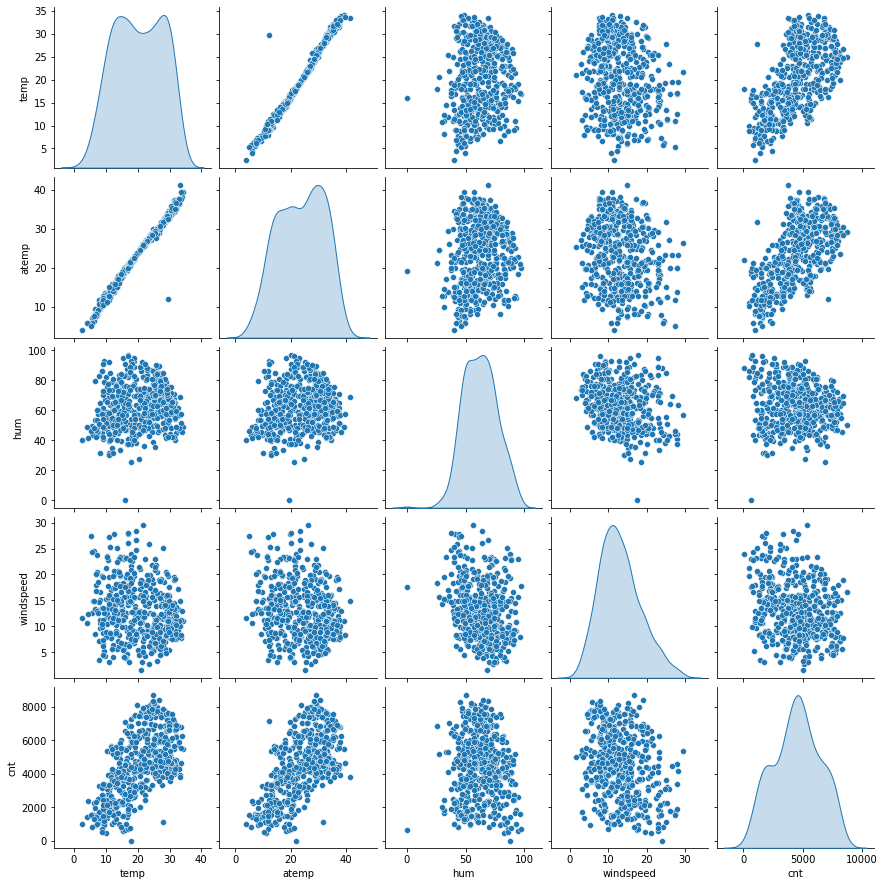

In [97]:
Bikesharing_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(Bikesharing_num, diag_kind='kde')
plt.show()

### Visualising catagorical variable

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 337 to 481
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

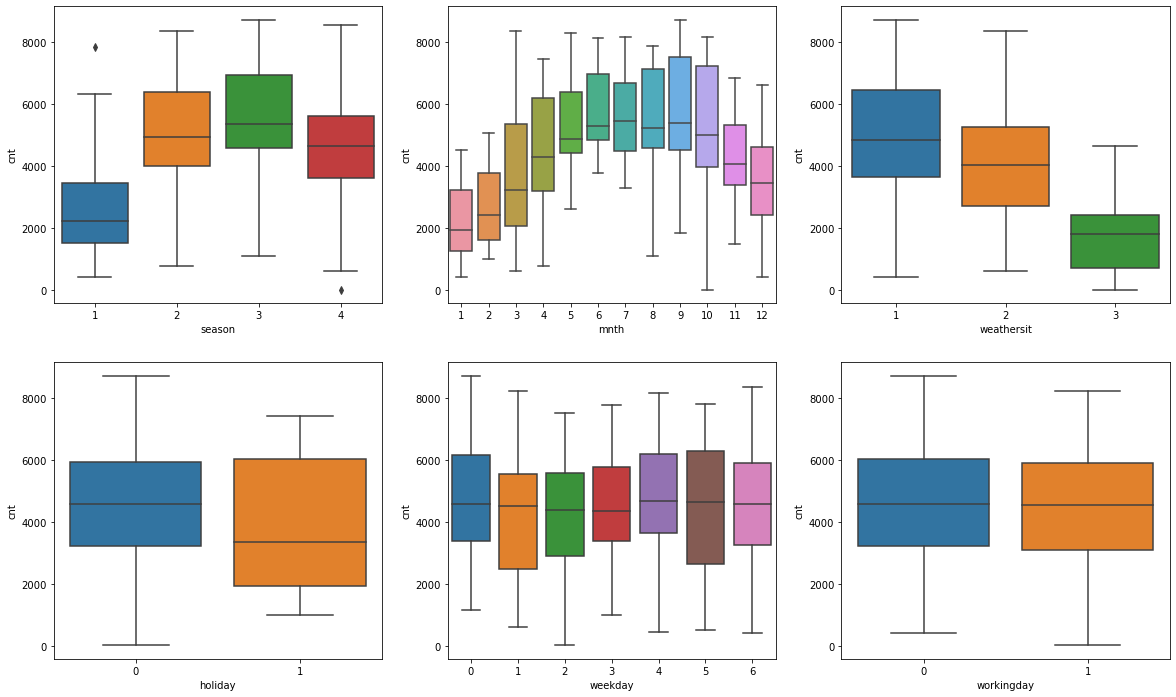

In [99]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)

sns.boxplot(x = 'season', y = 'cnt', data = Bikesharing_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikesharing_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bikesharing_data)
plt.show()

### Rescaling the features

In [100]:
#Instantiate an object
scaler = MinMaxScaler()

In [101]:
#checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
337,0,0,1,13.564153,17.45500,77.5833,5.625206,3485,0,0,...,0,1,0,1,0,0,0,0,0,0
547,1,0,1,32.048347,35.10190,44.7083,13.082889,6227,0,1,...,0,0,0,1,0,0,0,0,0,0
626,1,0,1,22.652500,27.02020,53.6667,14.416725,7591,0,1,...,0,0,0,0,0,1,0,0,0,0
309,0,0,1,14.281653,18.11790,73.4583,6.167631,3649,0,0,...,1,0,0,1,0,0,0,0,0,0
561,1,0,1,31.296653,36.20625,64.5000,11.000529,6830,0,1,...,0,0,0,1,0,0,0,0,0,0


In [102]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [103]:
#Apply scaler to all variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [104]:
#Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
337,0,0,1,0.350567,0.361341,0.799484,0.146877,0.398412,0,0,...,0,1,0,1,0,0,0,0,0,0
547,1,0,1,0.932261,0.833624,0.460712,0.412422,0.713875,0,1,...,0,0,0,1,0,0,0,0,0,0
626,1,0,1,0.636576,0.617334,0.553027,0.459915,0.870801,0,1,...,0,0,0,0,0,1,0,0,0,0
309,0,0,1,0.373147,0.379082,0.756977,0.166191,0.417280,0,0,...,1,0,0,1,0,0,0,0,0,0
561,1,0,1,0.908606,0.863180,0.664663,0.338275,0.783249,0,1,...,0,0,0,1,0,0,0,0,0,0


## Step 3: Training the Model

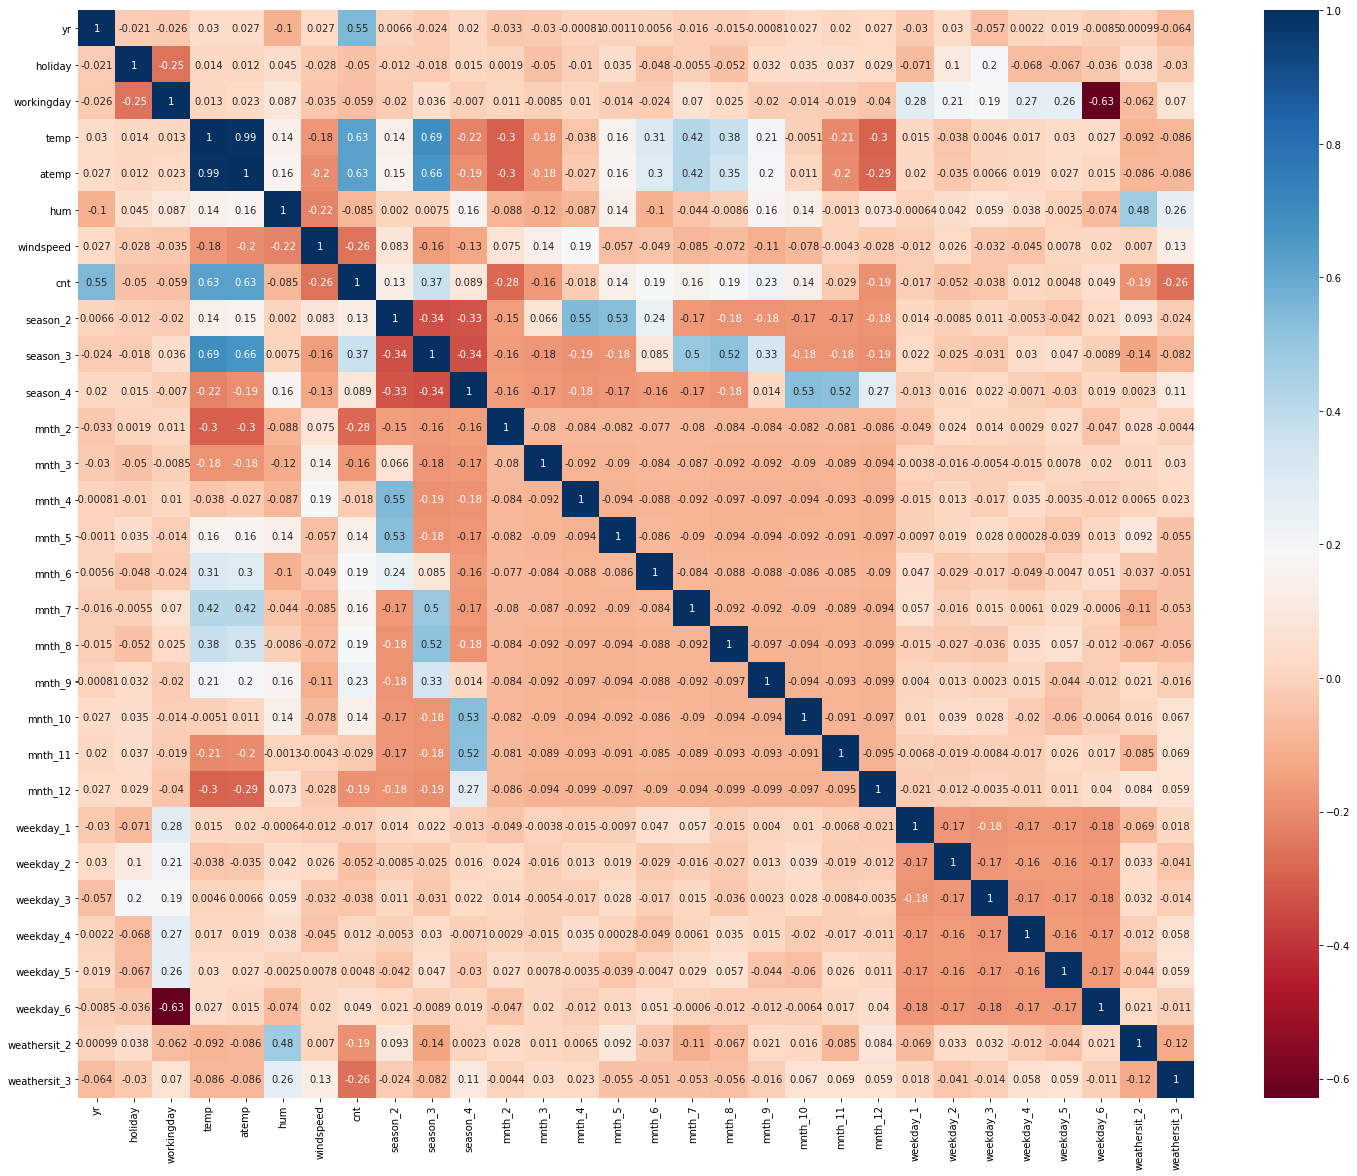

In [105]:
#heatmap
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

### Building a linear model

### RFE

In [106]:
#Dividing into X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train

In [107]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [108]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 7),
 ('mnth_4', False, 10),
 ('mnth_5', False, 6),
 ('mnth_6', False, 9),
 ('mnth_7', False, 15),
 ('mnth_8', False, 8),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 13),
 ('mnth_12', False, 12),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 14),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [109]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [110]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [111]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building models using stats Model, for the detailed statitics

#### Model1

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,390.23
9,weekday_1,85.31
11,weekday_3,85.06
10,weekday_2,79.01
12,weekday_4,78.79
13,weekday_5,77.70
1,holiday,14.19
4,hum,11.87
3,temp,6.83
5,windspeed,4.33


In [113]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [114]:
# Check the parameters obtained

lr1.params

const           0.294102
yr              0.221928
holiday        -0.285503
workingday     -0.237343
temp            0.568635
hum            -0.282758
windspeed      -0.177784
season_2        0.087798
season_4        0.151817
mnth_9          0.115324
weekday_1       0.215497
weekday_2       0.200172
weekday_3       0.216555
weekday_4       0.225679
weekday_5       0.225149
weathersit_3   -0.173973
dtype: float64

In [115]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.54e-185
Time:                        13:08:21   Log-Likelihood:                 509.91
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     494   BIC:                            -920.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2941      0.026     11.310   

### Model 2

In [118]:
# Removing the hum variable value because of its high P value
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

### VIF

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,390.21
8,weekday_1,85.26
10,weekday_3,84.99
9,weekday_2,78.95
11,weekday_4,78.73
12,weekday_5,77.67
1,holiday,14.19
3,temp,4.42
4,windspeed,3.68
0,yr,1.92


In [120]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# fit model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [121]:
# Check the parameters

lr2.params

const           0.118848
yr              0.228990
holiday        -0.259914
workingday     -0.203762
temp            0.545501
windspeed      -0.134128
season_2        0.079560
season_4        0.135754
mnth_9          0.096827
weekday_1       0.177933
weekday_2       0.155496
weekday_3       0.174043
weekday_4       0.185817
weekday_5       0.186968
weathersit_3   -0.241073
dtype: float64

In [122]:
# Print a summary of the linear regression model 
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.23e-169
Time:                        13:17:17   Log-Likelihood:                 469.27
No. Observations:                 510   AIC:                            -908.5
Df Residuals:                     495   BIC:                            -845.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1188      0.019      6.176   

### Model3

In [123]:
# Removing the weekday_2 variable value because of its high P value
X_train_new = X_train_rfe.drop(["weekday_2"], axis = 1)

In [125]:
 #Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,11.86
2,workingday,7.54
3,temp,6.83
5,windspeed,4.33
9,weekday_1,2.11
10,weekday_3,2.08
11,weekday_4,2.03
12,weekday_5,2.02
0,yr,1.93
7,season_4,1.62


In [127]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [128]:
lr3.params

const           0.291689
yr              0.222803
holiday        -0.101486
workingday     -0.038809
temp            0.568720
hum            -0.279465
windspeed      -0.177101
season_2        0.087679
season_4        0.150127
mnth_9          0.115803
weekday_1       0.016932
weekday_3       0.019501
weekday_4       0.027053
weekday_5       0.026508
weathersit_3   -0.174258
dtype: float64

In [129]:
# Print a summary of the linear regression 
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.01e-185
Time:                        14:00:14   Log-Likelihood:                 507.63
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     495   BIC:                            -921.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2917      0.026     11.189   

### Model 4

In [131]:
# Removing the weekday_1  variable value because of its high P value
X_train_new = X_train_rfe.drop(["weekday_1"], axis = 1)

In [132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,11.86
2,workingday,6.92
3,temp,6.83
5,windspeed,4.33
10,weekday_3,2.05
9,weekday_2,1.95
0,yr,1.93
11,weekday_4,1.92
12,weekday_5,1.91
7,season_4,1.62


In [133]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [134]:
# Check the parameters 

lr4.params

const           0.291920
yr              0.222743
holiday        -0.089197
workingday     -0.024418
temp            0.568982
hum            -0.279804
windspeed      -0.177368
season_2        0.087702
season_4        0.149983
mnth_9          0.115820
weekday_2      -0.011696
weekday_3       0.005323
weekday_4       0.012639
weekday_5       0.012092
weathersit_3   -0.173791
dtype: float64

In [135]:
# Print a summary of the linear regression model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.5
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          1.40e-185
Time:                        14:09:11   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     495   BIC:                            -921.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2919      0.026     11.187   

## Step 4: Residual Analysis

In [136]:
y_train_pred = lr4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

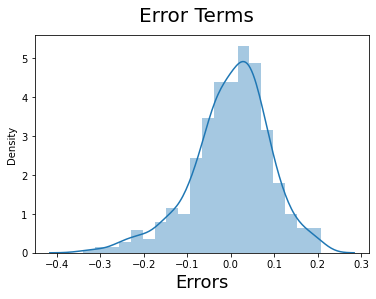

In [137]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

### Dividing into X_test and y_test

In [139]:
y_test = df_test.pop('cnt')
X_test = df_testa
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [141]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 146 to 293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_4      219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
 10  weekday_2     219 non-null    uint8  
 11  weekday_3     219 non-null    uint8  
 12  weekday_4     219 non-null    uint8  
 13  weekday_5     219 non-null    uint8  
 14  weathersit_3  219 non-null    uint8  
dtypes: float64(4), int64(3), uint8(8)
memory usage: 15.4 KB


In [142]:
# Making predictions using the final model (lr4)

y_pred = lr4.predict(X_test_lm4)

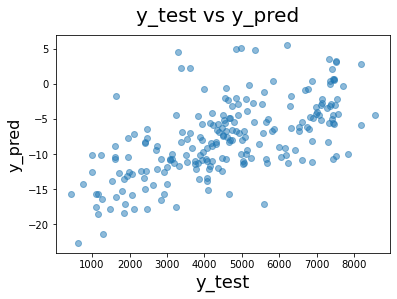

In [143]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()